<a href="https://colab.research.google.com/github/maheshkumarpatnaik/DATA-SCIENCE-INTERNSHIP/blob/main/DATA_SCIENCE_TASK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('spam.csv', encoding = 'latin-1')

In [ ]:
df


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df.shape

(5572, 5)

In [ ]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [ ]:
df.rename(columns={'v1' : 'target' , 'v2' : 'text'}, inplace = True)

In [ ]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.preprocessing import LabelEncoder

# 0=ham, 1=spam
le=LabelEncoder()
df['target']=le.fit_transform(df['target'])

In [ ]:
df.duplicated().sum()

403

In [ ]:
#remove duplicates

df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

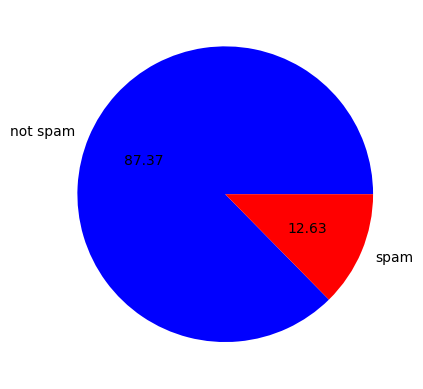

In [ ]:
# Exploitary data analysis

#ham & spam in pie chart

plt.pie(df['target'].value_counts(),labels=['not spam','spam'],colors=['blue','red'],autopct='%0.2f')
plt.show()

In [ ]:
# adding three numerical columns named - 
# 1. number of characters
# 2. number of words
# 3. number of sentences

import nltk

In [ ]:
#number of charecters

df['no_characters'] = df['text'].apply(len)
df.sample(5)

C:\Users\kakli\AppData\Local\Temp\ipykernel_15312\103410752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_characters'] = df['text'].apply(len)


,target,text,no_characters
3395,1,URGENT! Your Mobile number has been awarded wi...,127
1805,0,God bless.get good sleep my dear...i will pray!,47
1414,0,So wats ur opinion abt him and how abt is char...,52
3237,0,Good. No swimsuit allowed :),28
4782,0,Especially since i talk about boston all up in...,147


In [ ]:
df['no_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)

C:\Users\kakli\AppData\Local\Temp\ipykernel_15312\993757804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


,target,text,no_characters,no_words
1595,0,Pls confirm the time to collect the cheque.,43,9
3818,0,"sorry brah, just finished the last of my exams...",55,13
5405,0,So how many days since then?,28,7
5417,0,Nope. I just forgot. Will show next week,40,10
2220,0,But really quite funny lor wat... Then u shd h...,76,16


In [ ]:
df['no_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.sample(5)

C:\Users\kakli\AppData\Local\Temp\ipykernel_15312\1768758173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


,target,text,no_characters,no_words,no_sentences
1714,0,Yeah I don't see why not,24,7,1
1095,0,Ryder unsold.now gibbs.,23,4,1
2925,0,Im done. Just studyn in library,31,7,2
3437,0,Its good to hear from you,25,6,1
5295,0,Alex says he's not ok with you not being ok wi...,51,13,1


In [ ]:
#statistical checking

df[['no_characters','no_words','no_sentences']].describe()

,no_characters,no_words,no_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# spam

df[df['target'] == 0][['no_characters','no_words','no_sentences']].describe()

,no_characters,no_words,no_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='no_characters', ylabel='Count'>

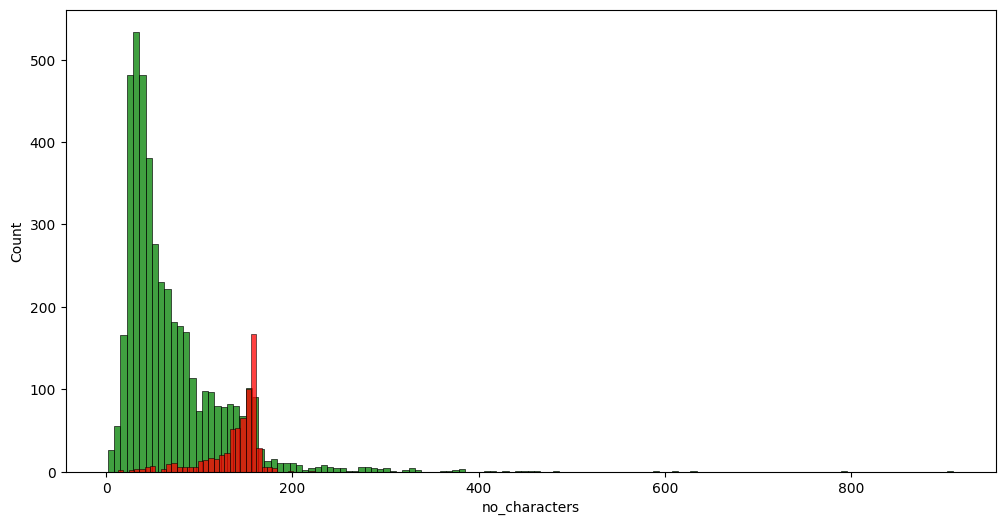

In [ ]:
#histogram about number of charecters in ham & spam

plt.figure(figsize=(12,6))
#hm
sns.histplot(df[df['target'] == 0]['no_characters'],color='green')
#spam
sns.histplot(df[df['target'] == 1]['no_characters'],color='red')

<Axes: xlabel='no_words', ylabel='Count'>

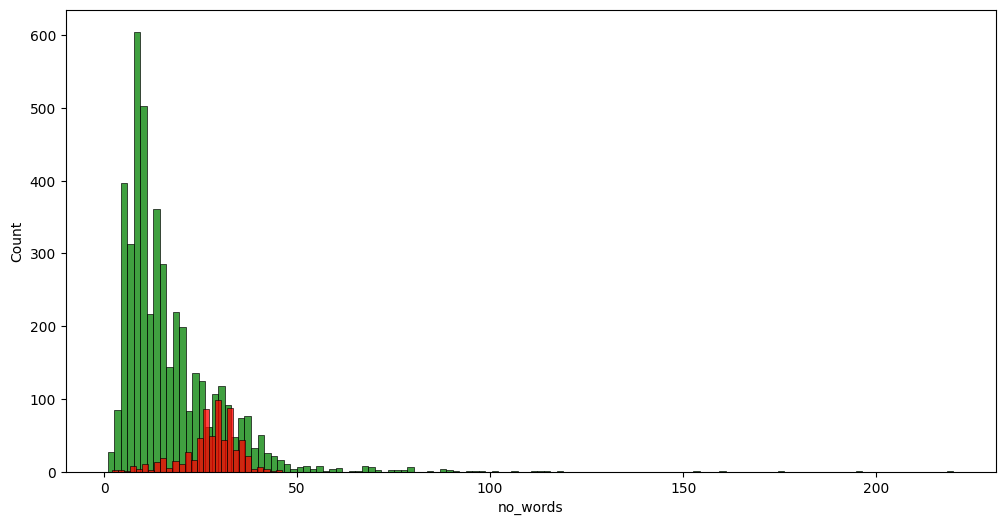

In [ ]:
#histogram about number of charecters in ham & spam

plt.figure(figsize=(12,6))
#ham
sns.histplot(df[df['target'] == 0]['no_words'],color='green')
#spam
sns.histplot(df[df['target'] == 1]['no_words'], color = 'red')

C:\Users\kakli\AppData\Local\Temp\ipykernel_15312\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

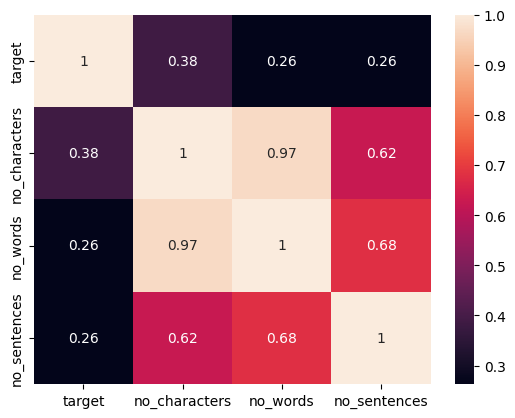

In [ ]:
sns.heatmap(df.corr(),annot=True)

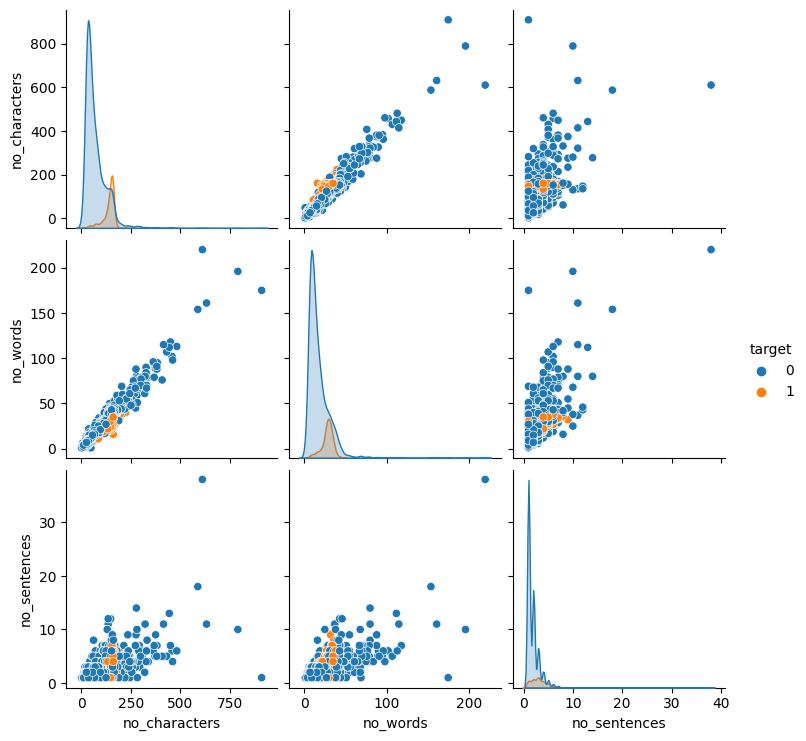

In [ ]:
sns.pairplot(df,hue='target')

In [ ]:
# Data Preprocessing 

#stopwords array

spw=["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]


In [ ]:
# function for following processes

def transform_text(text):
    
    #to make lowercase
    text = text.lower()
    
    #to tokenize
    text = nltk.word_tokenize(text)
    
    #removing special charecters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    #Removing stop words and punctuation
    from nltk.corpus import stopwords
    import string
    for i in text:
        if i not in spw and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    #Stemming
    from nltk.stem.porter import PorterStemmer
    ps=PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon talk stuff tonight cri today'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)
df.sample(10)

C:\Users\kakli\AppData\Local\Temp\ipykernel_15312\3674237431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


,target,text,no_characters,no_words,no_sentences,transformed_text
2213,0,"Goodmorning, today i am late for 2hrs. Because...",60,14,2,goodmorn today late 2hr pain
307,0,Lol yes. Our friendship is hanging on a thread...,71,17,2,lol friendship hang thread buy stuff
3282,0,Hey tmr maybe can meet you at yck,33,8,1,hey tmr meet yck
809,0,Ugh I don't wanna get out of bed. It's so warm.,47,16,2,ugh wan bed warm
4735,0,"Not for possession, especially not first offense",48,8,1,possess offens
2020,0,Anything lor but toa payoh got place 2 walk me...,50,11,1,lor toa payoh place 2 walk meh
1155,0,"Sorry man, accidentally left my phone on silen...",91,20,1,man accident left phone silent night check
3981,0,His frens go then he in lor. Not alone wif my ...,60,17,2,fren lor wif mum si lor
2502,0,Ola would get back to you maybe not today but ...,306,79,5,ola today told direct link car bid onlin arran...
4353,1,important information 4 orange user 0789xxxxxx...,163,29,2,4 orang user 0789xxxxxxx today lucki day 2find...


In [ ]:
# Model Building

#to convert the texts in a vector ()

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()                                         #bag of words
tfidf = TfidfVectorizer(max_features=3000)                     #tf-idf

In [ ]:
m = cv.fit_transform(df['transformed_text']).toarray()

In [ ]:
m.shape

(5169, 6356)

In [ ]:
x = tfidf.fit_transform(df['transformed_text']).toarray()
x.shape

(5169, 3000)

In [ ]:
#output

y = df['target'].values
y.shape

(5169,)

In [ ]:
#spiliting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
import re

In [ ]:
#Multinomial naive bayes 

mnb=MultinomialNB()
mnb.fit(x_train,y_train)
y_pred_mnb=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))

0.9748549323017408
0.9912280701754386


In [ ]:
### Function to check a Messege spam or not on the basis of our Model
def isSpam(s):
    s=re.sub(pattern='[^a-zA-Z]',repl=' ',string=s)          #to make alphaneumeric
    s=s.lower()                                              #to make lowercase
    s_words = s.split()                                      #to divide in words
    s_words=[word for word in s_words if not word in spw]    #deleting the stopwords
    ps = PorterStemmer()
    message=[ps.stem(word) for word in s_words]              #stemming
    message = ' '.join(message)

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
ans=['Broo, this is a SPAM!','Ohhh, this is a normal message.']

In [ ]:
msg="FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"
if isSpam(msg):
    print(ans[0])
else:
    print(ans[1])

Ohhh, this is a normal message.


In [ ]:
import pickle
pickle.dump(mnb,open('spam_detection.pkl','wb'))